# Lab 1: Linear models
## Part 1: Classification 
The [Fashion-MNIST dataset](https://www.openml.org/d/40996) contains 70,000 images of Zalando fashion products, classified into 10 types of clothing, each represented by 28 by 28 pixel values. We's see how well we can classify these with linear models. Let's start with looking at our data:

In [1]:
# General imports. Make sure you have recent versions off all required libraries installed.
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures

In [2]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

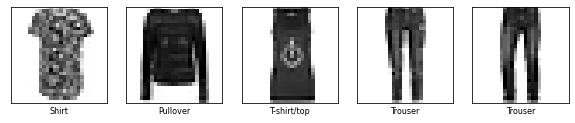

In [3]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

## Exercise 1: A quick benchmark
First, we'll try the default [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [Linear SVMs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC). Click the links to read the documentation. We'll also compare it to [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) instead of  [`cross_val_scores`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score).

For now we are just interested in a quick approximation, so we don't use the full dataset for our experiments. Instead, we use 10% of our samples:

In [4]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1)

With this small sample of our data we can now train and evaluate the three classifiers.

### Exercise 1.1
Implement a function below which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You are allowed to import additional functions from whichever module you like, but you should be able to complete the function with [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function and standard Python built-ins. Below the function you will find example output.

In [5]:
def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    
    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:     
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    pass

# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                               [0.867, 0.868, 0.865, 0.866, 0.866]], # Classifier 3 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.
#                               [0.804, 0.814, 0.806, 0.821, 0.806]]) # Classifier 3 test score for each of 5 folds.

#### Solution

In [6]:
# MODEL IMPLEMENTATION:
def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    
    Given a list of classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:     
     [Classifier1 train scores, ..., ClassifierN train scores], [Classifier1 test scores, ..., ClassifierN test scores]
    """
    # Evaluate with 3-fold cross-validation.
    xvals = [cross_validate(clf, X, y, return_train_score= True, n_jobs=-1) for clf in classifiers]
    train_scores = [x['train_score'] for x in xvals]
    test_scores = [x['test_score'] for x in xvals]
    return train_scores, test_scores

### Exercise 1.2
Call the function you created with a Logistic Regression, Linear SVM, and k-Nearest Neighbors Classifier.
Store the return values in the variables `train_scores` and `test_scores`. Then, run the code given below to produce a plot visualizing the scores.

In [7]:
# Dummy code. Replace with the actual classifiers and scores
classifiers = [LogisticRegression()]
train_scores, test_scores = [[0.6,0.7,0.8]], [[0.5,0.6,0.7]]

#### Solution

In [8]:
classifiers = [LogisticRegression(), LinearSVC(), KNeighborsClassifier()]
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)

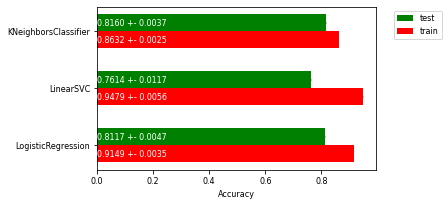

In [9]:
# Plot a bar chart of the train and test scores of all the classifiers, including the variance as error bars
fig, ax = plt.subplots()
width=0.3
ax.barh(np.arange(len(train_scores)), np.mean(test_scores, axis=1), width,
        yerr= np.std(test_scores, axis=1), color='green', label='test')
ax.barh(np.arange(len(train_scores))-width, np.mean(train_scores, axis=1), width,
        yerr= np.std(train_scores, axis=1), color='red', label='train')
for i, te, tr in zip(np.arange(len(train_scores)),test_scores,train_scores):
    ax.text(0, i, "{:.4f} +- {:.4f}".format(np.mean(te),np.std(te)), color='white', va='center')
    ax.text(0, i-width, "{:.4f} +- {:.4f}".format(np.mean(tr),np.std(tr)), color='white', va='center')
ax.set(yticks=np.arange(len(train_scores))-width/2, yticklabels=[c.__class__.__name__ for c in classifiers])
ax.set_xlabel('Accuracy')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### Exercise 1.3
Interpret the plot. Which is the best classifier? Are any of the models overfitting? If so, what can we do to solve this? Is there a lot of variance in the results?

#### Solution

k-NN and LogisticRegression have the best cross-validated test set performance. The linear SVM performs noticeably worse. Both linear models have a big difference between training set accuracy and test set accuracy. This indicates that both linear models are likely overfitted and need to be regularized. The standard deviation of the results is very small: the error bars are hardly noticeable.

## Exercise 2: Regularization
We will now tune these algorithm's main regularization hyperparameter: the misclassification cost in SVMs (C), the regularization parameter in logistic regression (C), and the number of neighbors (n_neighbors) in kNN. We expect the optimum for the C parameters to lie in $[10^{-12},10^{12}]$ and for n_neighbors between 1 and 50. C should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and k should be varied uniformly (i.e. [1,2,3,4]).

### Exercise 2.1
Vary the regularization parameters in the range given above and, for each classifier, create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, you should produce 3 plots, one for each classifier. Use the default 5-fold cross validation for all scores, but only plot the means.

Hints:
* Think about the time complexity of these models. Trying too many hyperparameter values may take too much time.
* You can make use of numpy's [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html), [geomspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html?highlight=geomspace#numpy.geomspace), and [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) functions.
* You can use matplotlib's default [plot](https://matplotlib.org/tutorials/introductory/pyplot.html) function to plot the train and test scores.
* You can manually loop over the hyperparameter ranges, or you can already check out scikit-learn's [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function to save some programming. We'll see it again later in the course.


#### Solution

In [10]:
from sklearn.model_selection import GridSearchCV

param_c = {'C': np.logspace(-12, 12, num=22)}
param_k = {'n_neighbors': np.geomspace(1, 60, num=12, dtype=int)[1:]}
grids = [param_c, param_c, param_k]
grid_searches = [GridSearchCV(clf, grid, n_jobs=-1, cv=3, return_train_score=True).fit(Xs, ys) for clf,grid in zip(classifiers,grids)]

In [11]:
# Generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

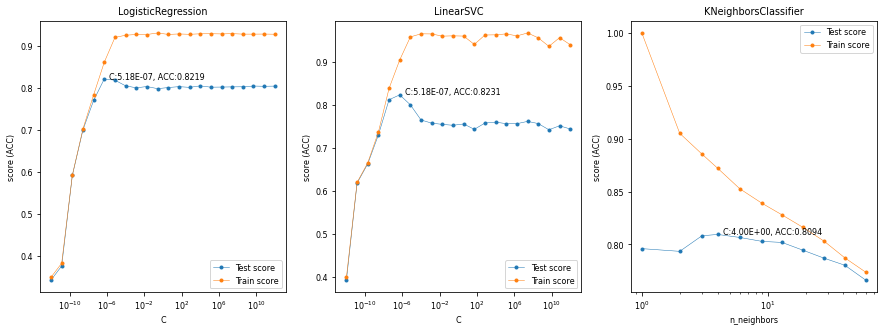

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for grid_search, param, ax in zip(grid_searches,['C','C','n_neighbors'],axes):
    plot_tuning(grid_search, param, ax)

### Exercise 2.2
Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

#### Solution

We find that, when properly regularized, the linear models both outperform kNN, and that linear SVMs seem to do slighty better of these two. Logistic regression underfits for small values of C, reaches an optimum around C=1e-7, and then starts overfitting. The linear SVM behaves the same way, but with an optimum around C=1e-8. The kNN overfits for small numbers of neighbors, reaches an optimum around n_neighbors=4, and then starts underfitting gradually. Note that these results were obtained on a 10% subsample. Results may be different when we optimize our models on the entire datset.

## Exercise 3: Interpreting misclassifications
Chances are that your models are not yet perfect. It is important to understand what kind of errors it still makes. Let's take a closer look at which instances are misclassified and which classes are often confused.
Train the logistic regression model with `C=1e-7`. Train the model on a training set, and make predictions for a test set (both sets should be  sampled from our 10% subsample).

In [13]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

### Exercise 3.1
Train the classifier as described above, obtain the predictions `y_pred` on the test set, and identify all the misclassified samples `misclassified_samples`. Then, run the visualization code below to study the misclassifications

In [14]:
# Implement the code to obtain the actual predictions on the test set
y_pred = list(y_test) # dummy values, replace y_test with the actual predictions

# Implement the code to obtain the indices of the misclassified samples
# Example output:
# misclassified_samples = [  11,   12,   14,   23,   30,   34,   39,   46,   50,   52,   55]
misclassified_samples = [0,1,2,3,4] # dummy values

#### Solution

In [31]:
# model implementation:
model = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred = model.predict(X_test)
misclassified_samples = np.nonzero(y_pred != list(y_test))[0]

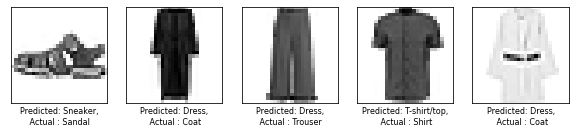

In [33]:
# Visualize the (first five) misclassifications, together with the predicted and actual class
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for nr, i in enumerate(misclassified_samples[:5]):
    axes[nr].imshow(X_test.values[i].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (fmnist_classes[int(y_pred[i])],fmnist_classes[int(y_test.values[i])]))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())

plt.show();

### Exercise 3.2
Interpret the results. Are these misclassifications to be expected? 

#### Solution

Some of these seem quite common mistakes, such as confusing shirts and coats. The images are quite coarse so there may not be enough detail. Others, like misclassifying a dress for a t-shirt, seem more curious. 

### Exercise 3.3.
Run the code below on your results to draw the complete confusion matrix and get more insight on the systematic misclassifications 
of your model. A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results. 
Does your model produce certain types of error more often than other types? 

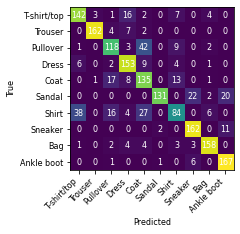

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

#### Solution

We see that some categories are much easier to predict than others. For instance, trousers and bags are almost always predicted correctly, while sneakers are occasionally confused with sandals or boots. Shirts, on the other hand, are misclassified close to half of the time, predominantly confused with t-shirts, pullovers, and coats.

## Exercise 4: Interpreting model parameters
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images.

### Exercise 4.1
Train a Logistic Regression model and a Linear SVM using their tuned hyperparameters from exercise 2. 
When in doubt, use `C=1e-7` for LogReg and `C=1e-8` for the SVM. 
Pass the trained model to the provided plotting function. Interpret the results in detail. 
Why do you get multiple plots per model? What do the features represent in your data. 
Does it seems like the models pay attention to the right features?
Do you models seem to ignore certain features? Do you observe differences in quality between the different classes? Do you observe any differences between the models?

In [35]:
# Plots the coefficients of the given model as 28x28 heatmaps. 
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

#### Solution

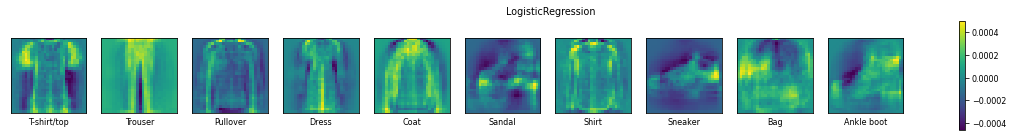

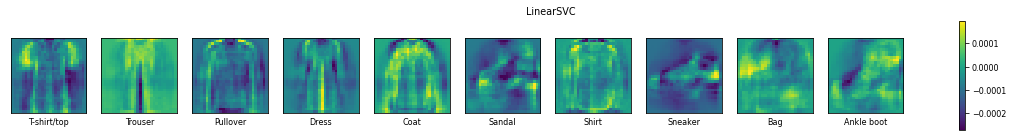

In [36]:
plot_coefficients(LogisticRegression(C=1e-7).fit(X_train,y_train))
plot_coefficients(LinearSVC(C=1e-8).fit(X_train,y_train))

Remember that linear models are typically binary classifiers. They will solve multi-class problems in a one-vs-all approach. Hence, for a 10-class problem, they will build 10 models, each one trained to predict whether an instance is from a specific class or not. This leads to 10 sets of 784 trained coefficients. Above, we plot them as 28x28 matrices, such that each coefficient is plotted at the location of their corresponding pixel value.

Very high values for coefficients (bright pixels in the images) or very low values (dark pixels in the images)
cause the corresponding pixel values to have a large effect on the final prediction. In other words, the very bright and very dark pixels in the images are the pixels that the model is mainly 'looking' at to make a prediction. We can easily recognize the shapes of the fashion items for each class. For instance, for classifying a t-shirt (yes or no), the model will blow up the pixel values near the edges of the shirt, and especially near the shoulders, while it will suppress the background pixel values near the outlines of the shirt. If the sum of all these values is large, it will likely lead to a positive prediction for that class.

We can also see that some classes are less defined than others in these images, and these are typically the classes which are easily confused for other classes.

Both models seem to focus on the same coefficients, yielding very similar images, yet smoother for the SVM.  Moreover, the Linear SVM uses much smaller coefficients.

Finally, out of curiosity, let's see the result of underfitting and overfitting on the learned coefficients:

### Exercise 4.2
Repeat the previous exercise, but now only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot. Interpret and explain the results.

#### Solution

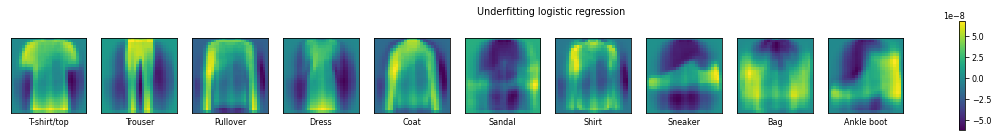

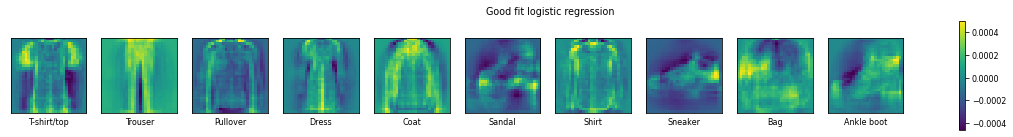

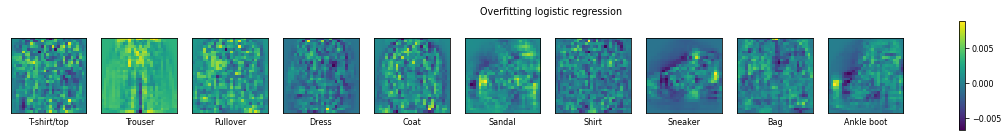

In [37]:
plot_coefficients(LogisticRegression(C=1e-12).fit(X_train,y_train),"Underfitting logistic regression")
plot_coefficients(LogisticRegression(C=1e-7).fit(X_train,y_train),"Good fit logistic regression")
plot_coefficients(LogisticRegression(C=1e+10).fit(X_train,y_train),"Overfitting logistic regression")

In the case that we underfit the logistic regression model, we see that the model has very strong believes of the shapes. This is evidenced by the many extreme weights (very bright or very dark). In the underfit model a t-shirt has, in addition to the short sleeves, a heigh weight for the bottom of the t-shirt. With the better tuned model (in the middle), the importance of the overall shape is still present, but the emphasis is on _just_ the short sleeves.

If we overfit the model, it pays attention to seemingly random pixels, including pixels that are simply background pixels. The coefficients are much higher (or much more negative), meaning that the model can yield different predictions for only slight variations in the input pixel value.

We can expect similar behavior from under- or overfitted linear SVMs.

## Part 2: Regression

The [NO2 dataset](https://www.openml.org/d/547) contains 500 measurement of pollution caused by cars. The goal is to predict the concentration of $NO_2$ from data about traffic and atmospheric conditions. The predictive variables include the number of cars per hour, temperature, wind, and time of day.

In [38]:
# General imports
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
from matplotlib import cm

In [39]:
# Download NO2 data. Takes a while the first time.
no2 = oml.datasets.get_dataset(547)
X, y, _, _ = no2.get_data(target=no2.default_target_attribute); 
attribute_names = list(X)

## Quick visualization
We can use pandas to quickly visualize the data. If you are new to pandas, take some time to understand the code.

We'll remove the 'day' feature to focus on the non-temporal aspects of this interaction. We are not aiming to predict future levels, and even if we would it would require special treatment (e.g. different train-test splits). There also doesn't seem to be a long term trend in the data, even though there are clear periodic trends in temperature.

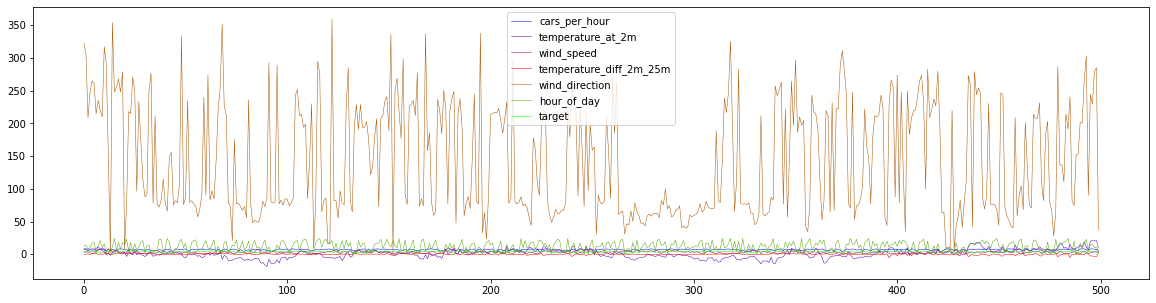

In [40]:
df = pd.DataFrame(X, columns=attribute_names).join(pd.DataFrame(list(y),columns=['target']))
df = df.sort_values(['day','hour_of_day']).drop('day',axis=1)
df.plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'));
X = X.drop('day',axis=1)

In [41]:
df.head()

,cars_per_hour,temperature_at_2m,wind_speed,temperature_diff_2m_25m,wind_direction,hour_of_day,target
42,7.64,8.5,4.3,-0.2,322.0,13,3.22
20,7.75,8.2,4.5,0.2,307.0,14,3.15
255,8.12,5.2,2.8,0.3,209.0,8,4.20
488,7.64,6.7,2.3,-0.4,247.0,10,3.98
94,8.32,6.3,1.2,1.3,265.0,17,4.14


If we plot the data, ordered by time of measurement, we can see that the wind direction (measured in angular degrees) is scaled very differently from the other features. Let's now zoom in to the other measures:

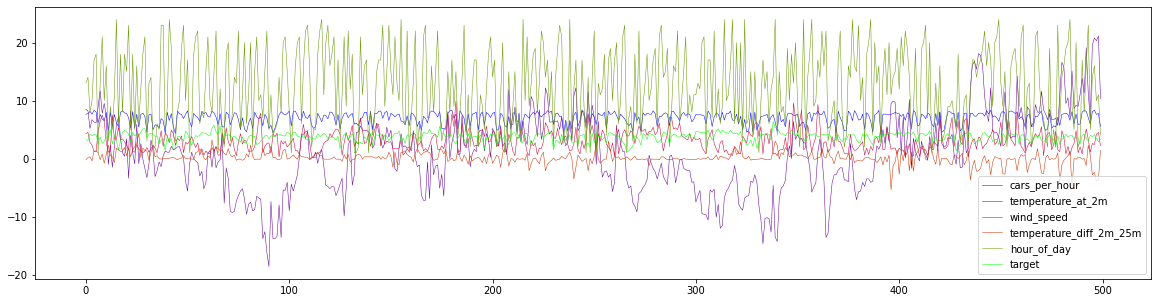

In [42]:
df.drop('wind_direction',axis=1).plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'));

We can see that the target ($NO_2$ levels) seem to be correlated to the number of cars per hour, which makes sense because cars produce $NO_2$. Other influences (air temperature differences and wind) seem to have a more complex and subtle effect. Let's try to model these using linear regression models.

## Exercise 1: Model benchmark
It is clear that $NO_2$ concentrations depend on a combination of these features, so we will now try to learn this complex relationship. We first evaluate a range of linear regression problems, i.e. Linear Regression, Ridge, Lasso and ElasticNet, as well as kNN. Since we observed that somf features have very different scales, we'll also build pipelines of all these measures with an additional scaling step. For now, we'll stick to the default hyperparameter settings. 

### Exercise 1.1
Implement a function below which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You are allowed to import additional functions from whichever module you like, but you should be able to complete the function with [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function and standard Python built-ins. Below you the function you will find example output.

In [43]:
def evaluate_learners(models, X, y):
    """     
    Given a list of models [model1, model2, ..., modelN] return two lists:
     - a list with the scores obtained on the training samples for each model,
     - a list with the test scores obtained on the test samples for each model.
     The order of scores should match the order in which the models were originally provided. E.g.:     
     [Model1 train score, ..., ModelN train score], [Model1 test score, ..., ModelN test score]
    """
    pass

# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Model 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Model 2 train score for each of 5 folds.
#                               ..
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Model 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Model 2 test score for each of 5 folds.
#                               ..

#### Solution

In [44]:
# MODEL IMPLEMENTATION:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def evaluate_learners(models, X, y):
    """ Evaluate each model in 'models' with cross-validation on the provided (X, y) data. 
    
    Given a list of models [model1, model2, ..., modelN] return two lists:
     - a list with the scores obtained on the training samples for each model,
     - a list with the test scores obtained on the test samples for each model.
     The order of scores should match the order in which the models were originally provided. E.g.:     
     [Model1 train score, ..., ModelN train score], [Model1 test score, ..., ModelN test score]
    """
    # Evaluate with 5-fold cross-validation.
    xvals = [cross_validate(m, X, y, return_train_score= True, n_jobs=-1) for m in models]
    test_scores = [x['test_score'] for x in xvals]
    train_scores = [x['train_score'] for x in xvals]
    return train_scores, test_scores

### Exercise 1.2
Call the function you created with a Linear Regression, Ridge, Lasso and ElasticNet, as well as kNN.
Store the return values in the variables `train_scores` and `test_scores`. Then, run the code given below to produce a plot visualizing the scores.

In [45]:
# Dummy code. Replace with the actual classifiers and scores
classifiers = [LinearRegression()]
train_scores, test_scores = [[0.6,0.7,0.8]], [[0.5,0.6,0.7]]

#### Solution

In [46]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), KNeighborsRegressor()]
models = np.array([m for m in models]).flatten()

train_scores, test_scores = evaluate_learners(models, X, y)

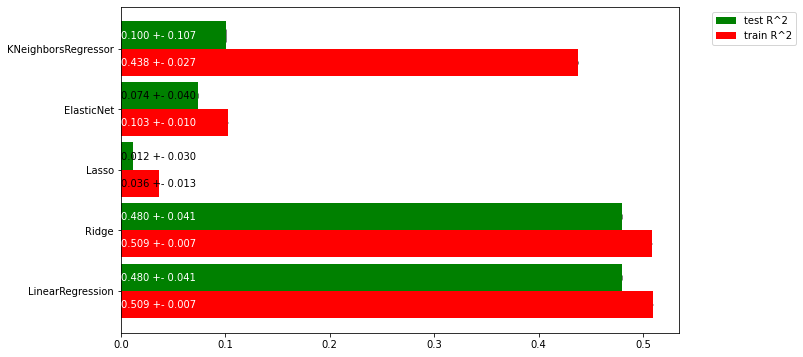

In [47]:
# Plot a bar chart of the train and test scores of all the classifiers, including the variance as error bars
fig, ax = plt.subplots(figsize=(10,6))
width=0.45

ax.barh(np.arange(len(train_scores)), np.mean(test_scores, axis=1), width,
        yerr= np.std(test_scores, axis=1), color='green', label='test R^2')
ax.barh(np.arange(len(train_scores))-width, np.mean(train_scores, axis=1), width,
        yerr= np.std(train_scores, axis=1), color='red', label='train R^2')
for i, te, tr in zip(np.arange(len(train_scores)),test_scores,train_scores):
    ax.text(0, i, "{:.3f} +- {:.3f}".format(np.mean(te),np.std(te)), color=('white' if np.mean(te)>0.1 else 'black'), va='center')
    ax.text(0, i-width, "{:.3f} +- {:.3f}".format(np.mean(tr),np.std(tr)), color=('white' if np.mean(tr)>0.1 else 'black'), va='center')
labels = [c.__class__.__name__ if not hasattr(c, 'steps') else c.steps[0][0] + "_" + c.steps[1][0] for c in models]
ax.set(yticks=np.arange(len(train_scores))-width/2, yticklabels=labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### Exercise 1.3
Interpret the plot. Which is the best regressor? Are any of the models overfitting? If so, what can we do to solve this? Is there a lot of variance in the results?

#### Solution

Linear regression and ridge regression don't surpass 0.5 $R^2$, yet don't seem to drastically overfit. kNN is drastically overfitting. Lasso and ElasticNet are catastrophically bad in their default settings.

## Exercise 2: Regularization 
We will now tune these algorithm's main regularization hyperparameter: the regularization hyperparameter (`alpha`) in Lasso and Ridge, and the number of neighbors (`n_neighbors`) in kNN.

We expect the optimum for the alpha parameters to lie in $[10^{-12},10^{12}]$ and for n_neighbors between 1 and 50. alpha should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]), k should be varied uniformly (i.e. [1,2,3,4]).

### Exercise 2.1
Vary the hyperparameters in the range given above and, for each regressor, create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, you should produce 3 plots, one for each regressor. Use the default 5-fold cross validation for all scores, but only plot the means.

Hints:
* Think about the time complexity of these models. Trying too many hyperparameter values may take too much time.
* You can make use of numpy's [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html), [geomspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html?highlight=geomspace#numpy.geomspace), and [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) functions.
* You can use matplotlib's default [plot](https://matplotlib.org/tutorials/introductory/pyplot.html) function to plot the train and test scores.
* You can manually loop over the hyperparameter ranges, or you can already check out scikit-learn's [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function to save some programming. We'll see it again later in the course.

#### Solution

In [48]:
# Design the hyperparameter search space
from sklearn.model_selection import GridSearchCV

param_a = {'alpha': np.logspace(-12, 12, num=22)}
param_elastic = {'l1_ratio': np.linspace(0, 1, num=11),
                 'alpha': np.logspace(-12, 12, num=25)}
param_k = {'kneighborsregressor__n_neighbors': np.geomspace(1, 60, num=12, dtype=int)[1:]}

models = [Ridge(), Lasso(), make_pipeline(StandardScaler(), KNeighborsRegressor()), ElasticNet()]

grids = [param_a,param_a,param_k,param_elastic]

In [49]:
# Generic plot for 1D grid search
def plot_tuning(grid_search, param_name, ax):
    """
    grid_search: the result of the GridSearchCV
    param_name: the name of the parameter that is being varied
    """
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend(loc='lower left')
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs+0.01,"  best:{:.2E}, R2:{:.4f}".format(bp,bs))

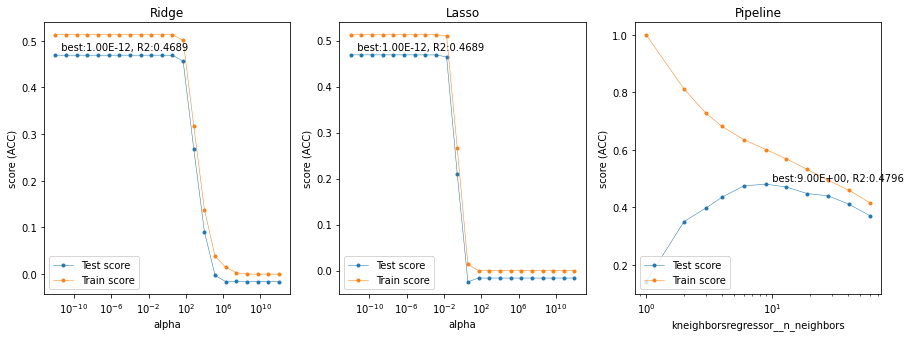

In [50]:
# Run the grid search
grid_searches = [GridSearchCV(m,grid,n_jobs=-1, cv=3, return_train_score=True).fit(X,y) for m,grid in zip(models,grids)]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for grid_search, param, ax in zip(grid_searches[0:3],['alpha','alpha','kneighborsregressor__n_neighbors'],axes):
    plot_tuning(grid_search, param, ax)

### Exercise 2.2
Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

#### Solution

Ridge and Lasso behave very similarly, producing the same optimal result for small alpha's (small amounts of regularization), and then quickly dropping down to default performance (0 $R^2$) around alpha=0.1. Any more regularization makes the model completely underfit the data. The only difference is that Ridge has a slightly more gradual descent than Lasso. kNN yields a worse score (0.4175 $R^2$) even after tuning. It has a clear optimum around 9 nearest neighbors, after which it gradually starts underfitting.

### Exercise 2.3
ElasticNet allows to mix L1 and L2 loss, and the `l1_ratio` hyperparameter defines the ratio of L1 loss. Hence, it has two interacting hyperparameters: l1_ratio and alpha. Run a grid search to obtain a matrix of l1_ratio and alpha values and the resulting cross-validation scores. Then, use the function provided below to plot a heatmap of all values and interpret the result. Can you explain how the two hyperparameters interact?

In [54]:
# Generic heatmap
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f", printvalues=False):
    """
    Plots a heatmap for the performance of a model for every combination of two hyperparameter values
    
    values: nxn array with all evaluation results, varying the first hyperparameter first
    xlabel: name of the first hyperparameter
    ylabel: name of the second hyperparameter
    xticklabels: values of the first hyperparameter
    yticklabels: values of the second hyperparameter
    cmap: colormap
    vmin: minimal score
    vmax: maximal score
    ax: plot axes
    fmt: format for printing the scores
    printvalues: whether to print the scores
    """
    if ax is None:
        ax = plt.gca()
    img = ax.pcolor(values, cmap=cmap, vmin=None, vmax=None)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)
    
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12, labelrotation=90)

    if(printvalues):
        for p, color, value in zip(img.get_paths(), img.get_facecolors(), img.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.mean(color[:3]) > 0.5:
                c = 'k'
            else:
                c = 'w'
            ax.text(x, y, fmt % value, color=c, ha="center", va="center", size=10)
    return img

#### Solution

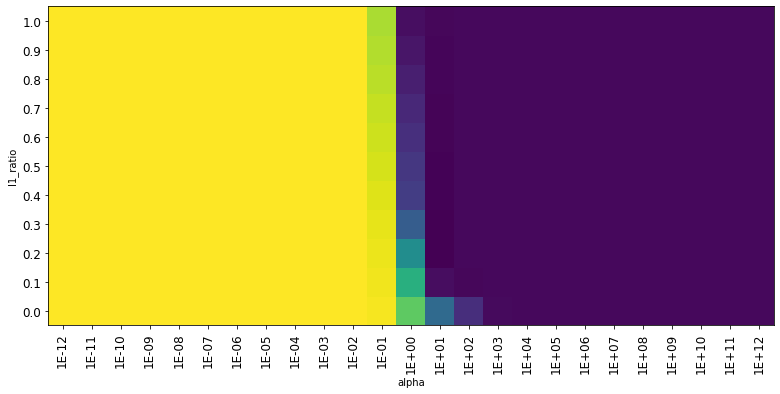

In [55]:
scores = np.array(pd.DataFrame(grid_searches[3].cv_results_).mean_test_score).reshape(25, 11).T
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(1, 1, figsize=(13, 13))
heatmap(scores, xlabel='alpha', xticklabels=list(map(lambda n: "%.E" % n, param_elastic['alpha'])),
        ylabel='l1_ratio', yticklabels=np.around(param_elastic['l1_ratio'],4), cmap="viridis", fmt="%.2f", ax=axes);

For ElasticNet we see the same sudden drop in performance around alpha=0.1. For l1_ratio=0, it is identical to Ridge (L2), showing a more gradual descent. For l1_ration=1, it is identical to Lasso (L1), showing the same sharp performance drop.

## Exercise 3: Visualizing coefficients
Finally, let's verify whether the different optimized linear models also find the same coefficients. 

### Exercise 3.1
Draw a [scatterplot](https://matplotlib.org/gallery/shapes_and_collections/scatter.html) plotting the coefficients of the different models in different colors. Do you see much difference between the different models?

For all models, choose an alpha parameter that seems to work well in the previous exercise. When in doubt, use alpha=0.001.

#### Solution

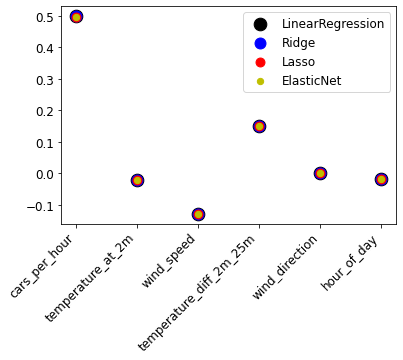

In [56]:
def scatter_coefficients(alpha=0.001):
    models = [LinearRegression(), Ridge(alpha=alpha), Lasso(alpha=alpha), ElasticNet(alpha=alpha)]
    coeff = [m.fit(X,y).coef_ for m in models]
    attribute_names = list(X)

    col = ['k','b','r','y']
    plt.figure()
    plt.xticks(rotation=45,ha="right")
    for i in range(0,4):
        plt.scatter(attribute_names, coeff[i], s=(4-i)*40, c=col[i], label=models[i].__class__.__name__)
    plt.legend();
scatter_coefficients(alpha=0.001)

The different techniques find almost _exactly_ the same coefficients (the markers overlap). cars_per_hour is the most influential, followed by temperature_diff_2m_25m and wind_speed. The others are nearly zero.

### Exercise 3.2
Redraw the same plot but now using a large amount of regularization (e.g. alpha=1). What do you observe? Does this help you explain the performance difference between Ridge and Lasso in exercise 1.2? 

#### Solution
Increasing alpha makes Lasso completely ignore most features: the coefficients are exactly 0. Hence, it is important to tune alpha carefully.

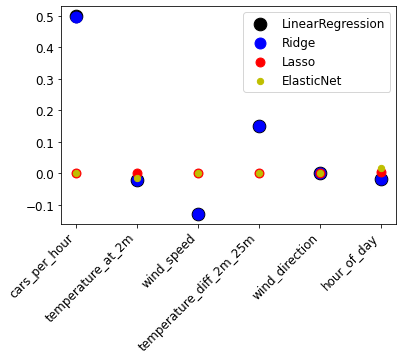

In [57]:
scatter_coefficients(alpha=1)